In [28]:
import glob
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow import keras

In [22]:
filled = glob.glob('data/filled/*.png')
empty = glob.glob('data/empty/*.png')

X = np.stack(np.array(Image.open(path)) for path in filled + empty)
y = np.concatenate([np.ones(len(filled)), np.zeros(len(empty))])

/opt/homebrew/Caskroom/miniforge/base/envs/chess/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [29]:
mobile_net = keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

for layer in mobile_net.layers:
    layer.trainable = False
    
inputs = keras.layers.Input(shape=(100, 100, 3))
embedding = mobile_net(inputs)
output = keras.layers.Flatten()(embedding)
output = keras.layers.Dense(64, activation='relu')(output)
output = keras.layers.Dense(32, activation='relu')(output)
output = keras.layers.Dense(1, activation='sigmoid')(output)
model = keras.models.Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 100, 100, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 3, 3, 1024)        3228864   
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                589888    
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 3,820,865
Trainable params: 592,001
Non-trainable params: 3,228,864
___________________________________________

First let's make sure that we can easily overfit.

In [30]:
hist = model.fit(X, y, validation_split=0.3, epochs=20)

Epoch 1/20


2022-01-02 15:10:47.943527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.3950 - accuracy: 0.8387

2022-01-02 15:10:51.062108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 4s 60ms/step - loss: 0.3950 - accuracy: 0.8387 - val_loss: 0.3418 - val_accuracy: 0.8428
Epoch 2/20
63/63 [==============================] - 3s 45ms/step - loss: 0.1805 - accuracy: 0.9285 - val_loss: 0.6337 - val_accuracy: 0.7387
Epoch 3/20
63/63 [==============================] - 3s 45ms/step - loss: 0.1117 - accuracy: 0.9608 - val_loss: 0.7538 - val_accuracy: 0.7318
Epoch 4/20
63/63 [==============================] - 3s 44ms/step - loss: 0.0780 - accuracy: 0.9722 - val_loss: 0.4130 - val_accuracy: 0.8486
Epoch 5/20
63/63 [==============================] - 3s 44ms/step - loss: 0.0502 - accuracy: 0.9851 - val_loss: 0.9315 - val_accuracy: 0.7191
Epoch 6/20
63/63 [==============================] - 3s 45ms/step - loss: 0.0329 - accuracy: 0.9940 - val_loss: 0.8427 - val_accuracy: 0.7723
Epoch 7/20
63/63 [==============================] - 3s 52ms/step - loss: 0.0196 - accuracy: 0.9975 - val_loss: 1.3062 - val_accuracy: 0.7017
Epoch 8/20
63/63 [======

<AxesSubplot:>

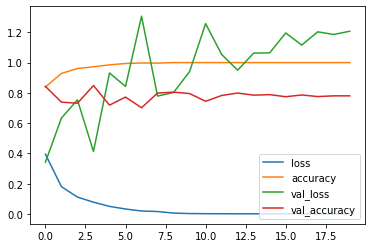

In [31]:
pd.DataFrame(hist.history).plot()

Let's add some dropout.

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 100, 100, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 3, 3, 1024)        3228864   
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                589888    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0   

2022-01-02 15:14:55.607697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.5848 - accuracy: 0.7633

2022-01-02 15:14:58.261968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 4s 53ms/step - loss: 0.5848 - accuracy: 0.7633 - val_loss: 0.7853 - val_accuracy: 0.5954
Epoch 2/20
63/63 [==============================] - 3s 45ms/step - loss: 0.3569 - accuracy: 0.8422 - val_loss: 0.7270 - val_accuracy: 0.5607
Epoch 3/20
63/63 [==============================] - 3s 45ms/step - loss: 0.3100 - accuracy: 0.8854 - val_loss: 0.6219 - val_accuracy: 0.7098
Epoch 4/20
63/63 [==============================] - 3s 45ms/step - loss: 0.2922 - accuracy: 0.8814 - val_loss: 0.6451 - val_accuracy: 0.7145
Epoch 5/20
63/63 [==============================] - 3s 46ms/step - loss: 0.2549 - accuracy: 0.8978 - val_loss: 0.9245 - val_accuracy: 0.6428
Epoch 6/20
63/63 [==============================] - 3s 44ms/step - loss: 0.2196 - accuracy: 0.9047 - val_loss: 0.5613 - val_accuracy: 0.7491
Epoch 7/20
63/63 [==============================] - 3s 45ms/step - loss: 0.2041 - accuracy: 0.9176 - val_loss: 0.5718 - val_accuracy: 0.7283
Epoch 8/20
63/63 [======

<AxesSubplot:>

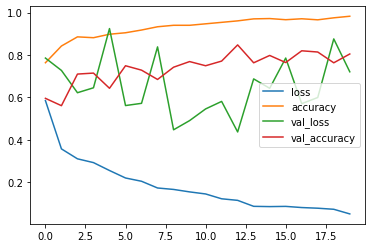

In [33]:
mobile_net = keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

for layer in mobile_net.layers:
    layer.trainable = False
    
inputs = keras.layers.Input(shape=(100, 100, 3))
embedding = mobile_net(inputs)
output = keras.layers.Flatten()(embedding)
output = keras.layers.Dense(64, activation='relu')(output)
output = keras.layers.Dropout(0.4)(output)
output = keras.layers.Dense(32, activation='relu')(output)
output = keras.layers.Dropout(0.4)(output)
output = keras.layers.Dense(1, activation='sigmoid')(output)
model = keras.models.Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

hist = model.fit(X, y, validation_split=0.3, epochs=20)
pd.DataFrame(hist.history).plot()

What if we allow to train all the layers and skip dropout instead?

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 100, 100, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 3, 3, 1024)        3228864   
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                589888    
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 3,820,865
Trainable params: 3,798,977
Non-trainable params: 21,888
____________________________________________

2022-01-02 15:12:15.827725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.2449 - accuracy: 0.9132

2022-01-02 15:12:29.063943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 15s 164ms/step - loss: 0.2449 - accuracy: 0.9132 - val_loss: 0.0911 - val_accuracy: 0.9699
Epoch 2/20
63/63 [==============================] - 8s 127ms/step - loss: 0.1170 - accuracy: 0.9658 - val_loss: 0.1700 - val_accuracy: 0.9607
Epoch 3/20
63/63 [==============================] - 8s 126ms/step - loss: 0.0585 - accuracy: 0.9806 - val_loss: 0.1414 - val_accuracy: 0.9514
Epoch 4/20
63/63 [==============================] - 7s 118ms/step - loss: 0.0325 - accuracy: 0.9901 - val_loss: 0.4414 - val_accuracy: 0.9260
Epoch 5/20
63/63 [==============================] - 7s 118ms/step - loss: 0.0549 - accuracy: 0.9811 - val_loss: 0.2711 - val_accuracy: 0.9480
Epoch 6/20
63/63 [==============================] - 7s 119ms/step - loss: 0.0360 - accuracy: 0.9886 - val_loss: 0.6931 - val_accuracy: 0.9029
Epoch 7/20
63/63 [==============================] - 8s 120ms/step - loss: 0.0172 - accuracy: 0.9931 - val_loss: 0.1924 - val_accuracy: 0.9538
Epoch 8/20
63/63

<AxesSubplot:>

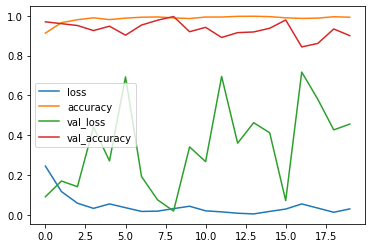

In [32]:
mobile_net = keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
inputs = keras.layers.Input(shape=(100, 100, 3))
embedding = mobile_net(inputs)
output = keras.layers.Flatten()(embedding)
output = keras.layers.Dense(64, activation='relu')(output)
output = keras.layers.Dense(32, activation='relu')(output)
output = keras.layers.Dense(1, activation='sigmoid')(output)
model = keras.models.Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

hist = model.fit(X, y, validation_split=0.3, epochs=20)
pd.DataFrame(hist.history).plot()

Combine both regularization approaches.

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 100, 100, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 3, 3, 1024)        3228864   
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                589888    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0   

2022-01-02 15:16:03.937475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.4073 - accuracy: 0.8680

2022-01-02 15:16:13.152789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 11s 155ms/step - loss: 0.4073 - accuracy: 0.8680 - val_loss: 0.2159 - val_accuracy: 0.9214
Epoch 2/20
63/63 [==============================] - 10s 156ms/step - loss: 0.1403 - accuracy: 0.9474 - val_loss: 0.8161 - val_accuracy: 0.8624
Epoch 3/20
63/63 [==============================] - 10s 140ms/step - loss: 0.1025 - accuracy: 0.9653 - val_loss: 0.6307 - val_accuracy: 0.9202
Epoch 4/20
63/63 [==============================] - 10s 149ms/step - loss: 0.0807 - accuracy: 0.9792 - val_loss: 0.2754 - val_accuracy: 0.9572
Epoch 5/20
63/63 [==============================] - 8s 126ms/step - loss: 0.1081 - accuracy: 0.9638 - val_loss: 0.2557 - val_accuracy: 0.9214
Epoch 6/20
63/63 [==============================] - 7s 116ms/step - loss: 0.0699 - accuracy: 0.9757 - val_loss: 0.0664 - val_accuracy: 0.9861
Epoch 7/20
63/63 [==============================] - 8s 126ms/step - loss: 0.0423 - accuracy: 0.9851 - val_loss: 0.1870 - val_accuracy: 0.9410
Epoch 8/20
63

<AxesSubplot:>

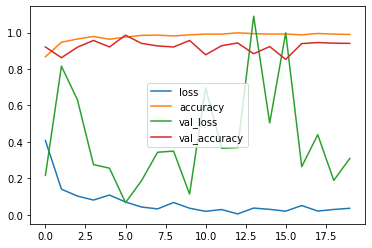

In [34]:
mobile_net = keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
inputs = keras.layers.Input(shape=(100, 100, 3))
embedding = mobile_net(inputs)
output = keras.layers.Flatten()(embedding)
output = keras.layers.Dense(64, activation='relu')(output)
output = keras.layers.Dropout(0.4)(output)
output = keras.layers.Dense(32, activation='relu')(output)
output = keras.layers.Dropout(0.4)(output)
output = keras.layers.Dense(1, activation='sigmoid')(output)
model = keras.models.Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

hist = model.fit(X, y, validation_split=0.3, epochs=20)
pd.DataFrame(hist.history).plot()

**Conclusion:** data is still not represenatative and we should collect much more examples. Still it looks like the task is solvable and we can expect ~95% accuracy. Given that we will combine that with game know how this should be more than enough.

Even knowing that our model at the moment is ~90% accurate we can still try to write gaming rules first because such accuracy might be enough to guide the game.

In [35]:
model.save('first_model.h5')